# LOAD LIBRARIES

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [65]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [7]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [66]:
from yellowbrick.cluster import KElbowVisualizer

In [67]:
col_names = ['Age','Workclass','Fnlwgt','Education','Education-num','Marital-status','Occupation','Relationship','Race','Sex','Capital-gain','Capital-loss','Hours-per-week','Native-country','Income']
Adult_data=pd.read_csv('adult.data',names = col_names,na_values = ' ?')
Adult_test=pd.read_csv('adult.test',names = col_names,na_values = ' ?', skiprows=[0])

In [68]:
Adult = pd.concat([Adult_data,Adult_test])

In [69]:
Adult = Adult.reset_index(drop=True)

In [70]:
Adult.info()
Adult.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48842 non-null  int64 
 1   Workclass       46043 non-null  object
 2   Fnlwgt          48842 non-null  int64 
 3   Education       48842 non-null  object
 4   Education-num   48842 non-null  int64 
 5   Marital-status  48842 non-null  object
 6   Occupation      46033 non-null  object
 7   Relationship    48842 non-null  object
 8   Race            48842 non-null  object
 9   Sex             48842 non-null  object
 10  Capital-gain    48842 non-null  int64 
 11  Capital-loss    48842 non-null  int64 
 12  Hours-per-week  48842 non-null  int64 
 13  Native-country  47985 non-null  object
 14  Income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Visualisation !

In [78]:
Adult.Income=np.where(Adult.Income == ' <=50K.', ' <=50K', Adult.Income)
Adult.Income=np.where(Adult.Income == ' >50K.', ' >50K', Adult.Income)

In [57]:
numeric_vars=[
    'Age','Fnlwgt','Education-num','Capital-gain','Capital-loss','Hours-per-week'
]

In [58]:
Adult_num=Adult.loc[:,numeric_vars]

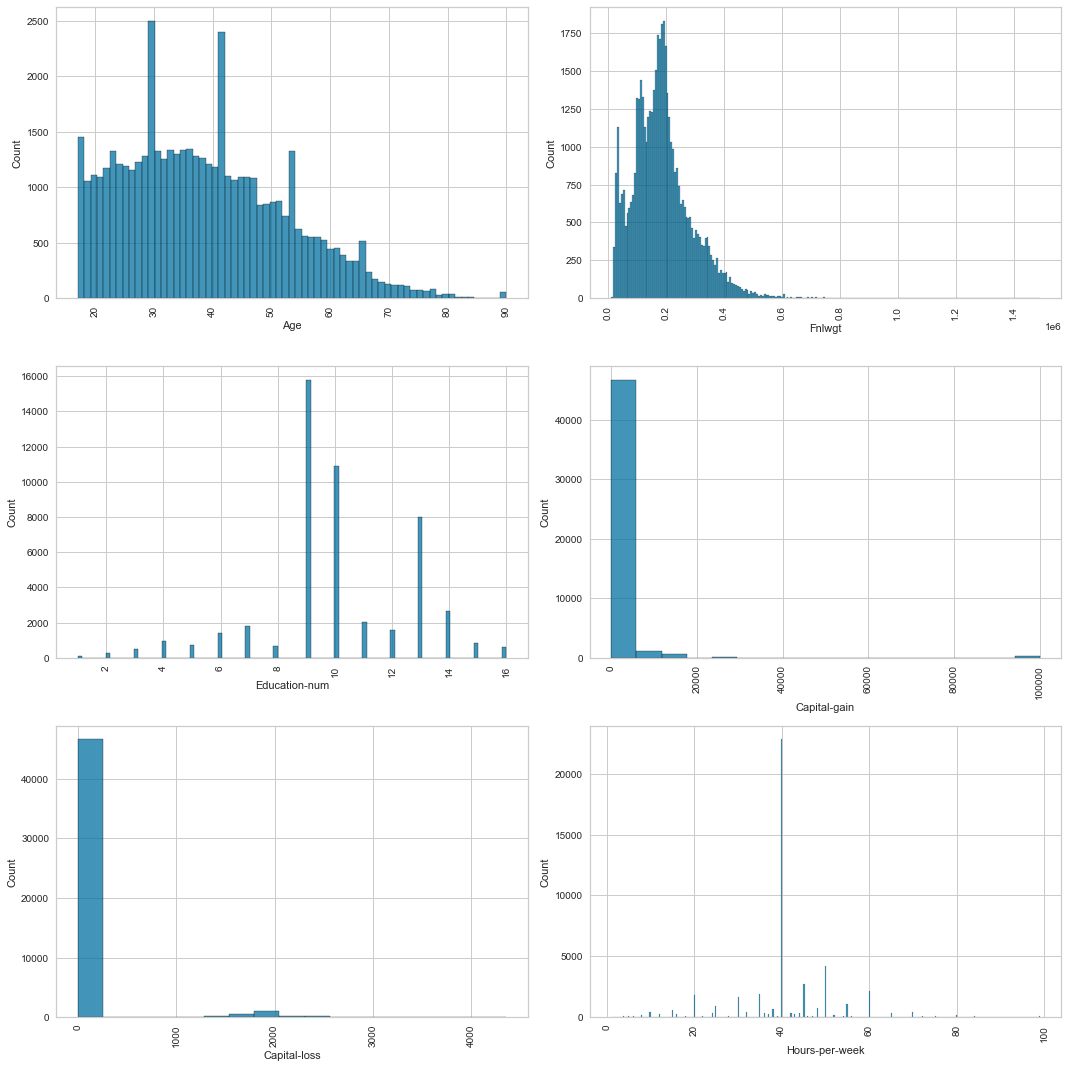

In [36]:
plt.figure(figsize=(15,15))

for plot in range(6):
    plt.subplot(3,2 , plot+1)
    plt.xticks(rotation='vertical')
    sns.histplot(data=Adult_num, x=Adult_num.iloc[:, plot])
    
plt.tight_layout()
plt.show()

# Dimensionality Reduction
Dimension reduction reduces the number of variables to the desired count. We'll plot using t-SNE.

# Scale Variables

In [37]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(Adult_num) 

t-SNE

In [38]:
reducer=TSNE(n_components=2, random_state=0)
reduced=reducer.fit_transform(Adult_num)
tsne_components=pd.DataFrame(reduced, columns=['tsne1', 'tsne2'])
tsne_components.head()

C:\Users\USER\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


,tsne1,tsne2
0,-39.915951,-7.674125
1,-38.412434,-23.227383
2,-21.098726,-23.393246
3,42.528763,-38.257572
4,-16.516615,10.328595


<AxesSubplot:xlabel='tsne1', ylabel='tsne2'>

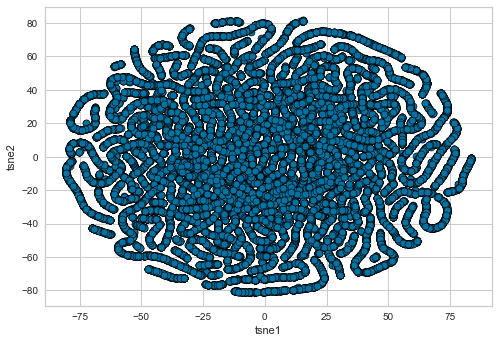

In [39]:
sns.scatterplot(x=tsne_components.tsne1, y=tsne_components.tsne2, edgecolor='black')

In [40]:
pca=PCA(n_components=2)
reduced=pca.fit_transform(X_scaled)
pca_components=pd.DataFrame(reduced, columns=['PCA1', 'PCA2'])
pca_components.head()

,PCA1,PCA2
0,0.826878,-0.268252
1,-0.124083,-1.076496
2,-0.432240,0.094957
3,-0.477463,-0.458727
4,-0.084854,1.486242


<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

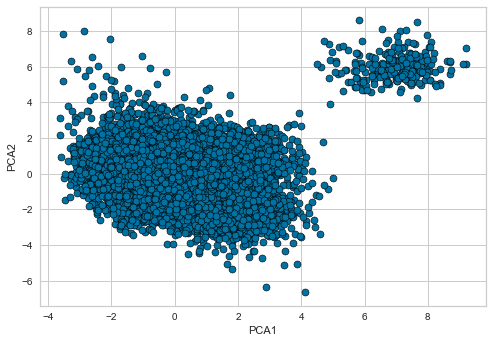

In [41]:
sns.scatterplot(x=pca_components.PCA1, y=pca_components.PCA2, edgecolor='black')

# K-MEAN

In [2]:
#ELBOW METHOD

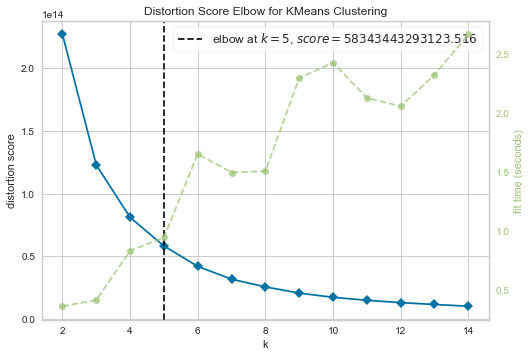

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [87]:
model=KMeans()
visualizer=KElbowVisualizer(model, k=(2, 15))

visualizer.fit(Adult_num)
visualizer.show()

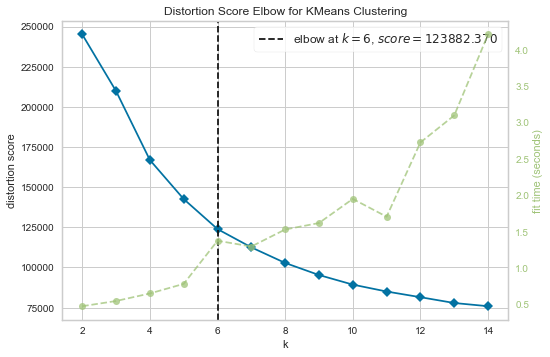

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
model=KMeans()
visualizer=KElbowVisualizer(model, k=(2, 15))

visualizer.fit(X_scaled)
visualizer.show()

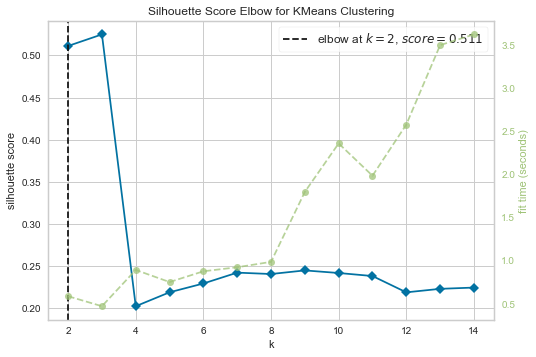

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [47]:
model=KMeans()
visualizer=KElbowVisualizer(model, k=(2, 15), metric='silhouette')

visualizer.fit(X_scaled)
visualizer.show()

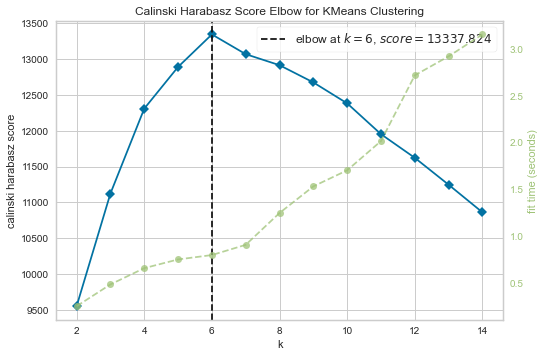

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [48]:
model=KMeans()
visualizer=KElbowVisualizer(model, k=(2, 15), metric='calinski_harabasz')

visualizer.fit(X_scaled)
visualizer.show()

In [17]:
##Selected kMeans clustering

In [54]:
cluster=KMeans(n_clusters=2, random_state=0)
clusters=cluster.fit_predict(X_scaled)

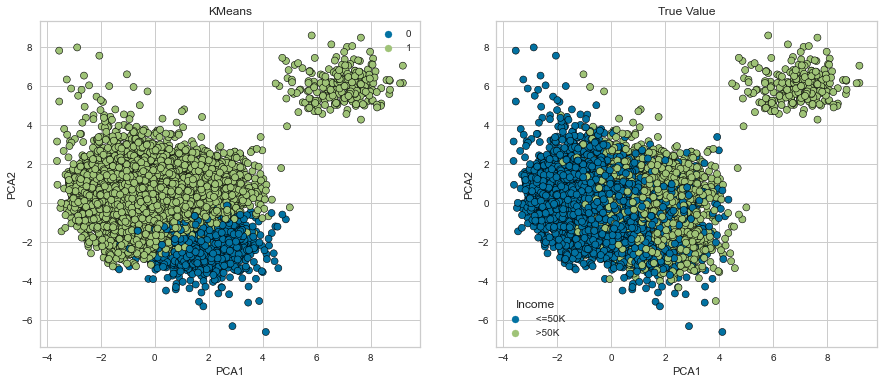

In [81]:
plt.figure(figsize=(15,6))

plt.subplot(121)
sns.scatterplot(x=pca_components.PCA1, y=pca_components.PCA2, edgecolor='black', hue=clusters)
plt.title('KMeans')

plt.subplot(122)
sns.scatterplot(x=pca_components.PCA1, y=pca_components.PCA2, edgecolor='black', hue=Adult['Income'])
plt.title('True Value')

plt.show()

# Heirarchical Clustering

In [82]:
hei = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clustershe=hei.fit_predict(X_scaled)

In [83]:
np.unique(clustershe, return_counts=True)

(array([0, 1], dtype=int64), array([46615,  2227], dtype=int64))

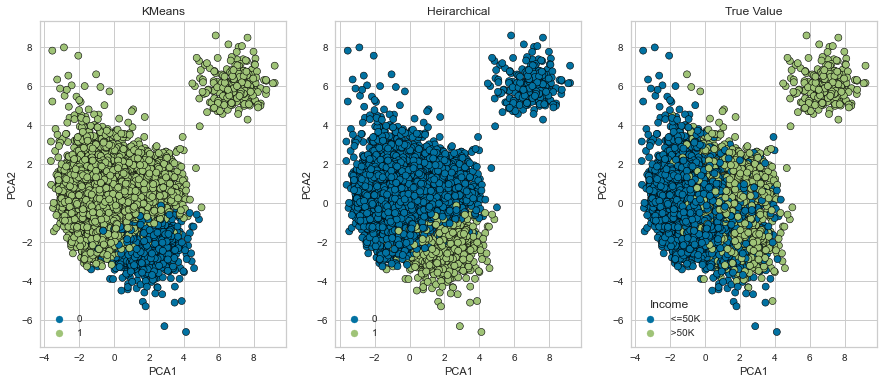

In [86]:
plt.figure(figsize=(15,6))

plt.subplot(131)
sns.scatterplot(x=pca_components.PCA1, y=pca_components.PCA2, edgecolor='black', hue=clusters)
plt.title('KMeans')

plt.subplot(132)
sns.scatterplot(x=pca_components.PCA1, y=pca_components.PCA2, edgecolor='black', hue=clustershe)
plt.title('Heirarchical')

plt.subplot(133)
sns.scatterplot(x=pca_components.PCA1, y=pca_components.PCA2, edgecolor='black', hue=Adult['Income'])
plt.title('True Value')

plt.show()

In [97]:
sil_kmean=metrics.silhouette_score(Adult_num, clusters)
sil_hei=metrics.silhouette_score(Adult_num, clustershe)

print(f'Silhouette Score\n=================')
print(f'KMeans: {sil_kmean}')
print(f'Heirarchical: {sil_hei}')

Silhouette Score
KMeans: -0.03026451890583973
Heirarchical: -0.03110680499452308


In [90]:
sil_kmean

-0.03026451890583973

In [91]:
print(metrics.homogeneity_score(Adult['Income'].values, clusters))
print(metrics.completeness_score(Adult['Income'].values, clusters))

0.015036253373927682
0.04447699084330932


In [92]:
print(metrics.homogeneity_score(Adult['Income'], clustershe))
print(metrics.completeness_score(Adult['Income'], clustershe))

0.015224527425901585
0.04520019011995363


In [99]:
y = Adult['Income']
X= Adult_num

In [100]:
def evaluation(y_true, y_fitted, X, model_name):
    
    Homo=metrics.homogeneity_score(y_true, y_fitted)
    Comp=metrics.completeness_score(y_true, y_fitted)
    Vmea=metrics.v_measure_score(y_true, y_fitted)
    AdjR=metrics.adjusted_rand_score(y_true, y_fitted)
    AdjM=metrics.adjusted_mutual_info_score(y_true, y_fitted)
    sil=metrics.silhouette_score(X, y_fitted)
    
    metric_value=[Homo, Comp, Vmea, AdjR, AdjM, sil]
    index=[
        'Homogeneity', 'Completeness', 'V-measure',
        'Adj. Rand Index', 'Adj. Mutual Information', 'Silhouette Score' 
    ]
    
    results=pd.DataFrame({
        model_name: metric_value
    }, index=index)
    
    return results

In [101]:
kmean_rslt=evaluation(y, clusters, X_scaled, 'KMeans')
hei_rslt=evaluation(y, clustershe, X_scaled, 'Heirarchical')

performance=pd.concat([kmean_rslt, hei_rslt], axis=1)
performance

,KMeans,Heirarchical
Homogeneity,0.015036,0.015225
Completeness,0.044477,0.045200
V-measure,0.022475,0.022777
Adj. Rand Index,0.063838,0.064178
Adj. Mutual Information,0.022447,0.022750
Silhouette Score,0.511189,0.511792


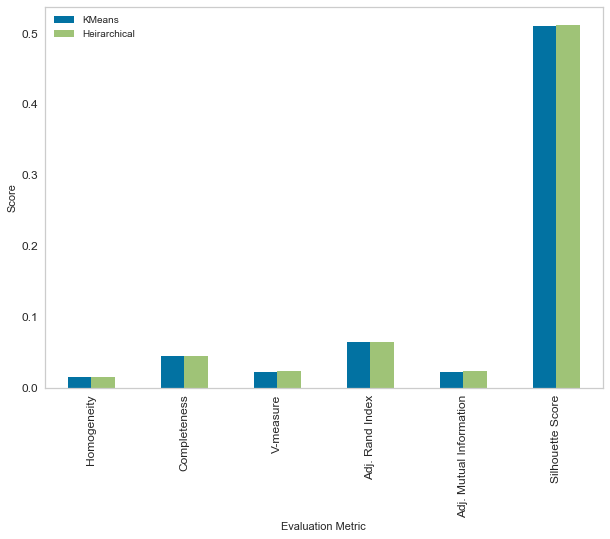

In [107]:
performance.plot(kind='bar', figsize=(10, 7), fontsize=12)
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.grid(False)
plt.show()